## Lab: Time-Series Regression using ARIMA model

### What is an ARIMA?

ARIMA stands for Auto-Regresssive Integrated Moving Average.  It is essentially a linear regression model for time-series data. When we watch a variable change over time, we can develop a model to help predict future movements.

In [11]:
%matplotlib inline
import pandas as pd
sales = pd.read_csv('/data/product-sales/product-sales.csv',
                    parse_dates=[0], index_col=0, date_parser=lambda x: pd.datetime.strptime('200'+x, '%Y-%m'))
sales

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


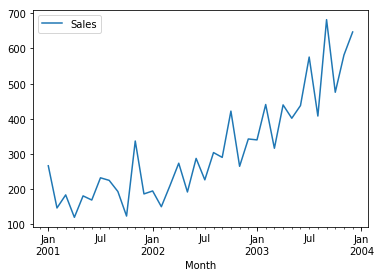

In [12]:
import matplotlib.pyplot as plt

sales.plot()

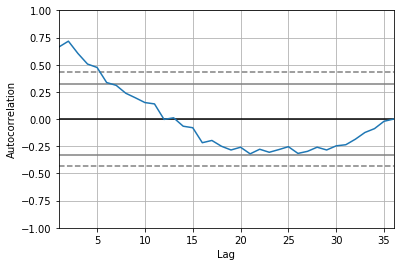

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sales, order=(5,1,0)).fit()
model.summary()

/Users/tfox/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/tfox/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 10 Jun 2018   AIC                            406.340
Time:                        18:53:37   BIC                            417.227
Sample:                    02-01-2001   HQIC                           410.098
                         - 12-01-2003                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
residuals = pd.DataFrame(model.resid)